In [58]:
# bob.refresh {"cron": "20 8 * * *", "timeout": 400000}
# bob.static {"token": "4622c4cc3822f6c1164cadbd53ed0d1230fb0a562d7c6bc824116cd82a78", "path": "/home/ftp/ftp/dev/wsr-public/data_output/France_HOSP_DEP_NAME.html", "filename": "../data_output/France_HOSP_DEP_NAME.html"} 
# bob.static {"token": "113a1888cfa76275418845a0a21fbed1e2f766bf12a0a7b9b72c20de1aa5", "path": "/home/ftp/ftp/dev/wsr-public/data_output/France_HOSP_REG_NAME.html", "filename": "../data_output/France_HOSP_REG_NAME.html"} 

In [59]:
%run __init__.ipynb

Successfully connected to MongoDB


In [60]:
# for i in range(0,95):
#     print(france_dep['features'][i]['properties'])

In [61]:
# for i in range(0,18):
#     print(france_reg['features'][i]['properties'])

In [62]:
#Département
dfFr = pd.read_csv(output_folder + 'FRANCE_INIT.csv').drop('Unnamed: 0',axis=1)
dfFr.columns= dfFr.columns.str.upper()
dfFr['JOUR']= pd.to_datetime(dfFr['JOUR'], format='%Y-%m-%d')
dfFr = dfFr[(dfFr['SEXE'] == 0)  & (dfFr['JOUR'] == yesterday.strftime('%Y-%m-%d'))].drop(['SEXE'],axis=1).reset_index(drop=True)
dfFr['DEP'] = dfFr['DEP'].astype(str)
ref_france['DEP_CODE'] = ref_france['DEP_CODE'].astype(str)
dfFr= pd.merge(dfFr,ref_france, left_on='DEP', right_on='DEP_CODE',how='left').drop(['DEP_CODE'], axis=1)
dfFr.head(5)

DEP       JOUR  HOSP  REA  RAD   DC                 DEP_NAME  \
0  01 2020-04-21   169   23  196   64                      Ain   
1  02 2020-04-21   295   40  515  183                    Aisne   
2  03 2020-04-21    56   18   99   22                   Allier   
3  04 2020-04-21    41    2   84    7  Alpes-de-Haute-Provence   
4  05 2020-04-21    41    9   87    6             Hautes-Alpes   

                     REG_NAME  
0        Auvergne-Rhône-Alpes  
1             Hauts-de-France  
2        Auvergne-Rhône-Alpes  
3  Provence-Alpes-Côte d'Azur  
4  Provence-Alpes-Côte d'Azur

In [63]:
#Région
dfFr_reg = dfFr.drop(['DEP','DEP_NAME'],axis=1).groupby(['JOUR','REG_NAME'],as_index=False).agg({'HOSP':'sum','DC':'sum','REA':'sum','RAD':'sum'})
dfFr_reg.head(5)

JOUR                 REG_NAME  HOSP    DC  REA   RAD
0 2020-04-21     Auvergne-Rhône-Alpes  2872  1103  551  4089
1 2020-04-21  Bourgogne-Franche-Comté  1319   705  229  1941
2 2020-04-21                 Bretagne   436   193   78   678
3 2020-04-21      Centre-Val de Loire   970   308  156   943
4 2020-04-21                    Corse    67    48   13   157

In [64]:
def analysis(df,variable):
    Min = df[variable].min()
    Max = df[variable].max()
    Avr = round(df[variable].mean(),0)
    Sum = df[variable].sum()
    to_print = f'{variable} : Min: {Min}, Max: {Max}, Average: {Avr}, Sum: {Sum}'
    return print(to_print)

In [71]:
#Var France
map_center = {"lat": 46.7667, "lon": 2.45}

def create_map(df,geo,kpi,dfKey,geoKey,scale,colors,map_center,label):
    fig_html = 'France_' + kpi + '_' + dfKey + ".html"
    fig = px.choropleth_mapbox(df, 
                               geojson=geo, 
                               color=kpi,
                               locations=dfKey, 
                               featureidkey=geoKey,
                               range_color=scale,
                               color_continuous_scale=colors,
                               mapbox_style="carto-positron", 
                               zoom=5, 
                               center=map_center,
                               labels=label,
                              )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},autosize=True)
    fig.write_html(output_folder + fig_html)
    updateChartCss(f"{output_folder}{fig_html}", f"{input_folder}map.css")
#     bob.makeStaticGettable(output_folder + fig_html,"dev")
    return fig

HOSP : Min: 3, Max: 2856, Average: 297.0, Sum: 29984


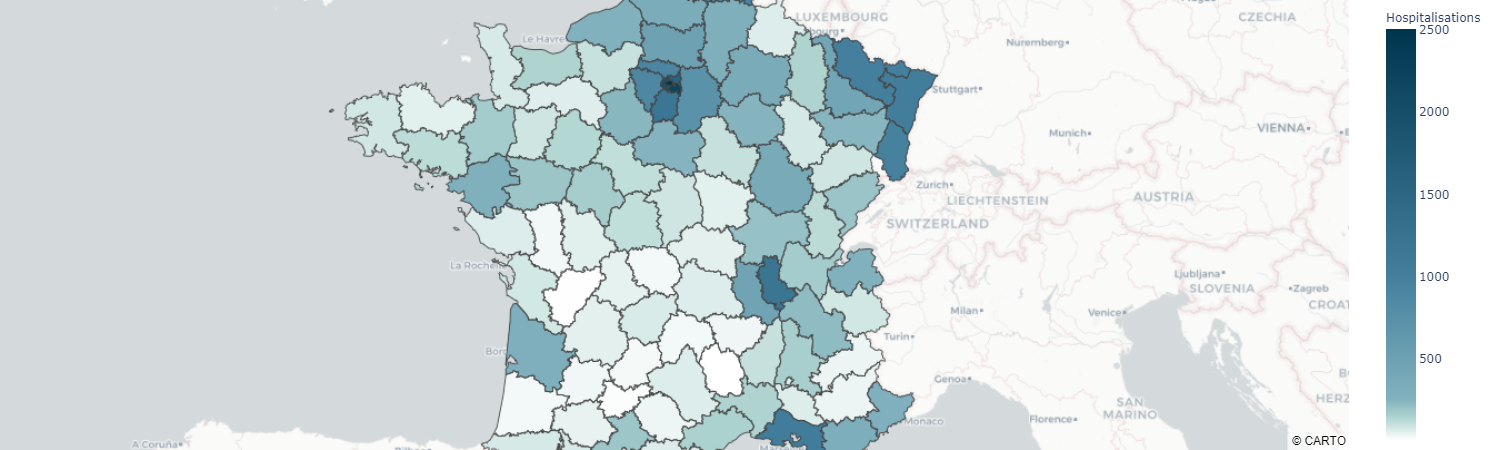

In [72]:
#Hospitalisation - Département
kpi='HOSP'
scale = (10,2500)
colors = [
    [0.0, "#FFFFFF"],
    [0.05,"#B3D7D2"],
    [0.1, "#81B1BD"],
    [0.4, "#437F9D"],
    [1.0, "#00354E"]
]
dfKey = "DEP_NAME"
geoKey="properties.nom"
to_rename = {'HOSP':'Hospitalisations','DEP_NAME':'Département'}
analysis(dfFr, kpi)
create_map(dfFr,france_dep,kpi,dfKey,geoKey,scale,colors,map_center,to_rename)

HOSP : Min: 3, Max: 12269, Average: 1666.0, Sum: 29984


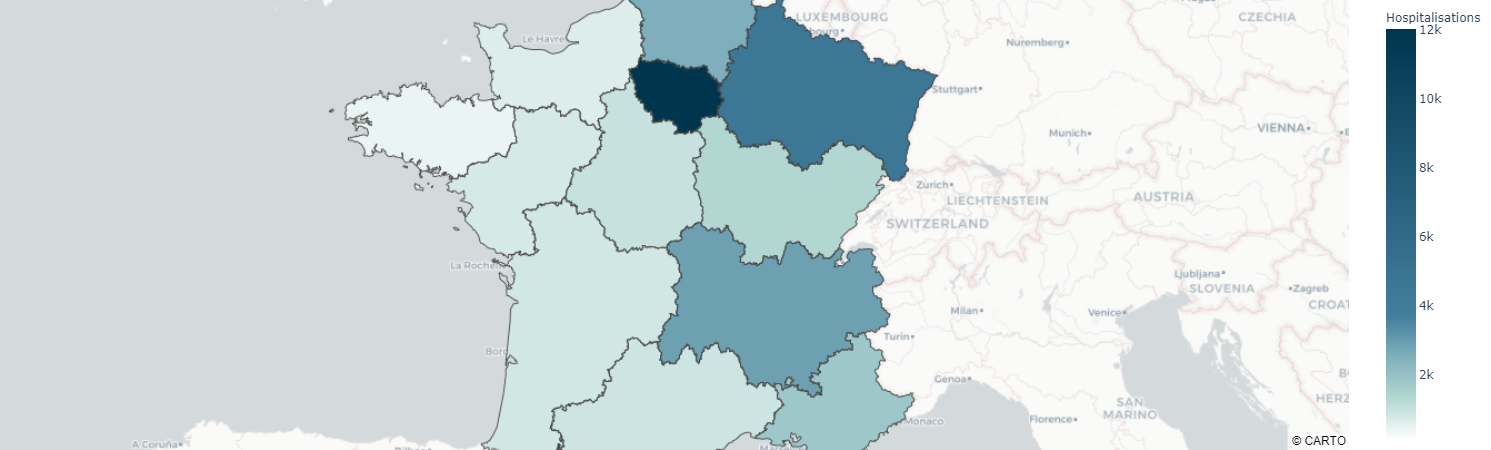

In [67]:
#Hospitalisation - Région
kpi='HOSP'
scale = (100,12000)
colors = [
    [0.0, "#FFFFFF"],
    [0.1,"#B3D7D2"],
    [0.2, "#81B1BD"],
    [0.3, "#437F9D"],
    [1.0, "#00354E"]
]
dfKey = "REG_NAME"
geoKey="properties.nom"
to_rename = {'HOSP':'Hospitalisations','REG_NAME':'Région'}
analysis(dfFr_reg, kpi)
create_map(dfFr_reg,france_reg,kpi,dfKey,geoKey,scale,colors,map_center,to_rename)

In [68]:
#html
#Par département
hosp_dep = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/4622c4cc3822f6c1164cadbd53ed0d1230fb0a562d7c6bc824116cd82a78', 'KPI' : 'Hospitalisations', 'UPPER_FILTER' : 'Par département'}]
rea_dep = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/7d0fe7cd6483514da087ccf755b574964d799167e7fa5a18962e5772b5c9', 'KPI' : 'En réanimation', 'UPPER_FILTER' : 'Par département'}]
dc_dep = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/efd045150687448d5dbdc2c0acb3e51b05e4ba28d2d29f4d533f29c14c2b', 'KPI' : 'Retours à domicile', 'UPPER_FILTER' : 'Par département'}]
rad_dep = [{'URL' :'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/d14c73baee025b68caae42cb577dbef7c665e74e0fa1b89458ea52a9aa3e', 'KPI' : 'Décès à l’hôpital', 'UPPER_FILTER' : 'Par département'}]
          
#Par région
hosp_reg = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/113a1888cfa76275418845a0a21fbed1e2f766bf12a0a7b9b72c20de1aa5', 'KPI' : 'Hospitalisations', 'UPPER_FILTER' : 'Par région'}]
rea_reg = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/7d0fe7cd6483514da087ccf755b574964d799167e7fa5a18962e5772b5c9', 'KPI' : 'En réanimation', 'UPPER_FILTER' : 'Par région'}]
dc_reg = [{'URL' : 'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/efd045150687448d5dbdc2c0acb3e51b05e4ba28d2d29f4d533f29c14c2b', 'KPI' : 'Retours à domicile', 'UPPER_FILTER' : 'Par région'}]
rad_reg = [{'URL' :'https://api.dev.cashstory.com/api/v1/notebook/bob_40cashstory_2Ecom/d14c73baee025b68caae42cb577dbef7c665e74e0fa1b89458ea52a9aa3e', 'KPI' : 'Décès à l’hôpital', 'UPPER_FILTER' : 'Par région'}]
            
list_kpis = hosp_dep + rea_dep + dc_dep + rad_dep + hosp_reg+ rea_reg + dc_reg + rad_reg
domain = pd.DataFrame(list_kpis)
domain.loc[:,'VALUE'] = """<iframe src='"""+ domain['URL'] +"""' frameborder='0' style='overflow:hidden;height:85vh;width:100%' height='100%' width='100%'></iframe> <style>.modebar{display: none!important;}</style>"""
if use_mongo:
    bob.mongo.save_df(domain,'110',db_app,True)
domain

Dataframe 110 successfully save in database app-wsr-dev in MongoDB. Time: --- 0.025139331817626953 secnds ---


URL                 KPI  \
0  https://api.dev.cashstory.com/api/v1/notebook/...    Hospitalisations   
1  https://api.dev.cashstory.com/api/v1/notebook/...      En réanimation   
2  https://api.dev.cashstory.com/api/v1/notebook/...  Retours à domicile   
3  https://api.dev.cashstory.com/api/v1/notebook/...   Décès à l’hôpital   
4  https://api.dev.cashstory.com/api/v1/notebook/...    Hospitalisations   
5  https://api.dev.cashstory.com/api/v1/notebook/...      En réanimation   
6  https://api.dev.cashstory.com/api/v1/notebook/...  Retours à domicile   
7  https://api.dev.cashstory.com/api/v1/notebook/...   Décès à l’hôpital   

      UPPER_FILTER                                              VALUE  
0  Par département  <iframe src='https://api.dev.cashstory.com/api...  
1  Par département  <iframe src='https://api.dev.cashstory.com/api...  
2  Par département  <iframe src='https://api.dev.cashstory.com/api...  
3  Par département  <iframe src='https://api.dev.cashstory.com/api...  
4       Par région  <iframe src='https://api.dev.cashstory.com/api...  
5       Par région  <iframe src='https://api.dev.cashstory.com/api...  
6       Par région  <iframe src='https://api.dev.cashstory.com/api...  
7       Par région  <iframe src='https://api.dev.cashstory.com/api...